In [1]:
import functools
import time

import jax
import jax.numpy as jnp
import jax.random
import diffrax
import numpy as np
import matplotlib.pyplot as plt

import orc.data

jax.config.update("jax_enable_x64", True)

# Visualization functions

In [2]:
def plot_time_series(U_lst,
                     t=None,
                     time_series_labels=None,
                     line_formats = None,
                     state_var_names=None,
                     t_lim = None,
                     figsize = (20,8),
                     **plot_kwargs):
    """Plot time series data with separate panels for each state variable.

    Parameters
    ----------
    U_lst : 2D array or list of 2D arrays
        If a 2D array, shape should be (Nt, Nu) where Nu is the number of state
        variables and Nt is the number of time points.If a list of 2D arrays,
        each array should have shape (Nt, Nu) and represent different time series.
    t : 1D array, optional
        1D array of time points. If None, the time points will be assumed to be
        evenly spaced from 0 to Nt-1.
    time_series_labels : list of strings, optional
        List of strings containing the labels for each time series to be shown in
        a legend. If None, no labels will be shown.
    line_formats : list of strings, optional
        List of strings containing the line formats for each time series. If None,
        default line format will be used.
    state_var_names : list of strings, optional
        List of strings containing the names of the state variables. If None,
        no y-axis labels will be shown.
    t_lim : tuple, optional
        Limit for the x-axis. If None, the x-axis will be set to the full
        range of time points.
    figsize : tuple, optional
        Size of the figure to be created. Default is (20, 8).
    plot_kwargs : dict, optional
        Additional arguments to pass to the plot function.
    """
    # defaults
    plot_kwargs.setdefault('linewidth', 2)

    # handle input data
    if not isinstance(U_lst, list):
        U_lst = [U_lst]
    Nu = U_lst[0].shape[1]
    Nt = U_lst[0].shape[0]

    # setup time vectors
    if t is None:
        t = jnp.arange(Nt)
    if t_lim is None:
        t_lim = t[-1]

    # handle optional inputs
    if time_series_labels is None:
        time_series_labels = [None for _ in range(len(U_lst))]
    if line_formats is None:
        line_formats = ['-' for _ in range(len(U_lst))]

    # plot
    _, axs = plt.subplots(Nu, figsize = figsize)
    for i in range(Nu):
        for j, Y in enumerate(U_lst):
            axs[i].plot(t, Y[:, i], line_formats[j], label=time_series_labels[j],
                         **plot_kwargs)
            axs[i].set_xlim([0, t_lim])
        if state_var_names is not None:
            axs[i].set(ylabel=state_var_names[i])
    if time_series_labels[0] is not None:
        axs[0].legend(loc='upper right')
    axs[-1].set(xlabel=r't')
    plt.show()

In [3]:
def imshow_1D_spatiotemp(U,
                         tN,
                         domain=(0,1),
                         figsize=(20, 6),
                         title = None,
                         **imshow_kwargs):
    '''
    Plot 1D spatiotemporal data using imshow.

    Parameters
    ----------
    U: 2D array
        Data to be plotted, shape should be (Nt, Nx) where Nt is the number of time points and Nx is the number of spatial points
    tN: float
        Final time of the simulation
    domain: tuple of length 2
        Bounds of the spatial domain, default is (0, 1)
    figsize: tuple
        Size of the figure to be created, default is (20, 6)
    title: string, optional
        Title of the plot, if None no title is shown
    **imshow_kwargs: additional arguments to pass to imshow
    '''

    #set defaults for imshow
    imshow_kwargs.setdefault('aspect', 'auto')
    imshow_kwargs.setdefault('origin', 'lower')
    imshow_kwargs.setdefault('cmap', 'RdGy')
    imshow_kwargs.setdefault('extent', [0, tN, domain[0], domain[1]])

    plt.figure(figsize=figsize, dpi=200)
    plt.imshow(U.T, **imshow_kwargs)
    plt.ylabel('x')
    plt.xlabel('t')
    if title is not None:
        plt.title(title)
    plt.colorbar(pad = 0.01, label = r'$u$')
    plt.show()
    
# TODO: Plot attractor for 3 dim systems

# integrators 

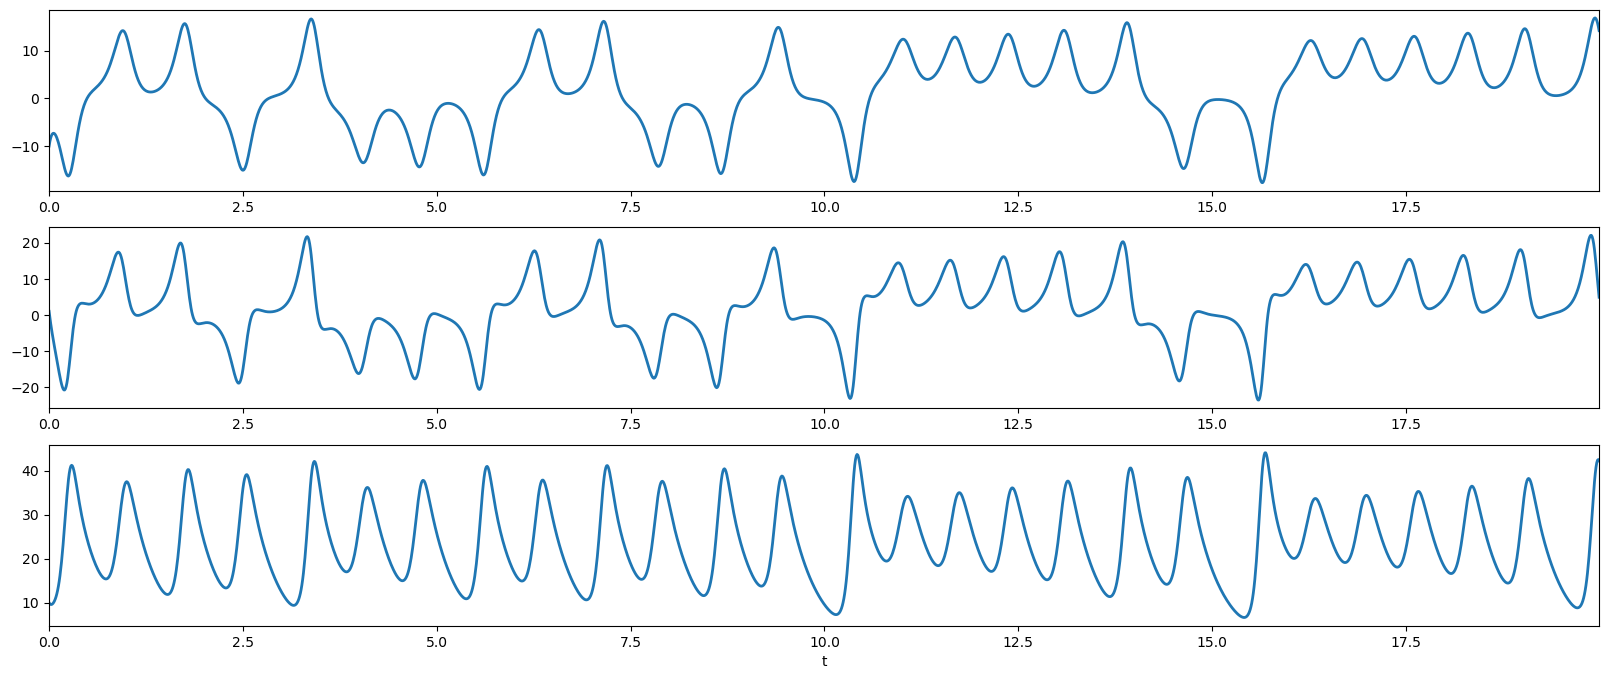

In [4]:
u,t = orc.data.lorenz63(tN = 20, dt = 0.01)
plot_time_series(u,t)

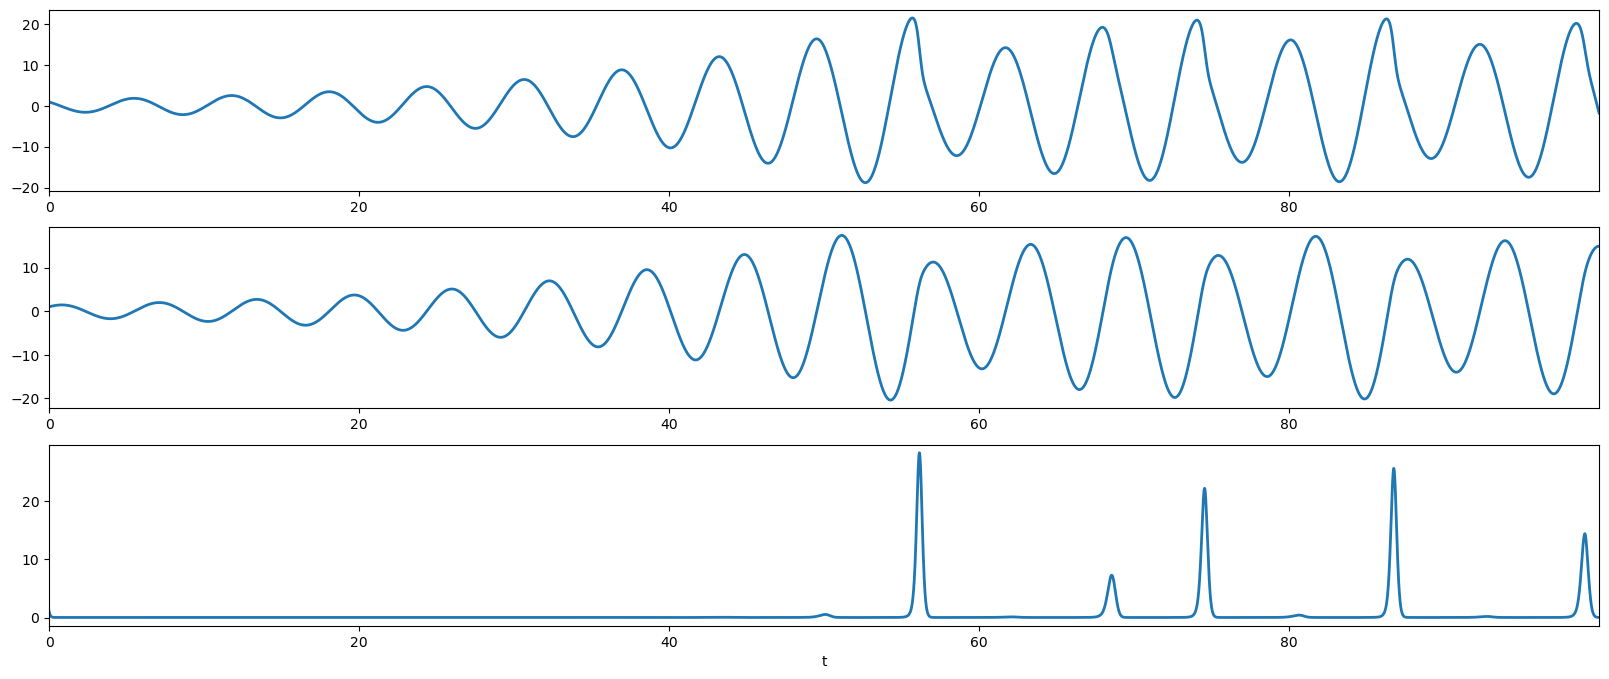

In [5]:
u,t = orc.data.rossler(tN = 100, dt = 0.01)
plot_time_series(u,t)

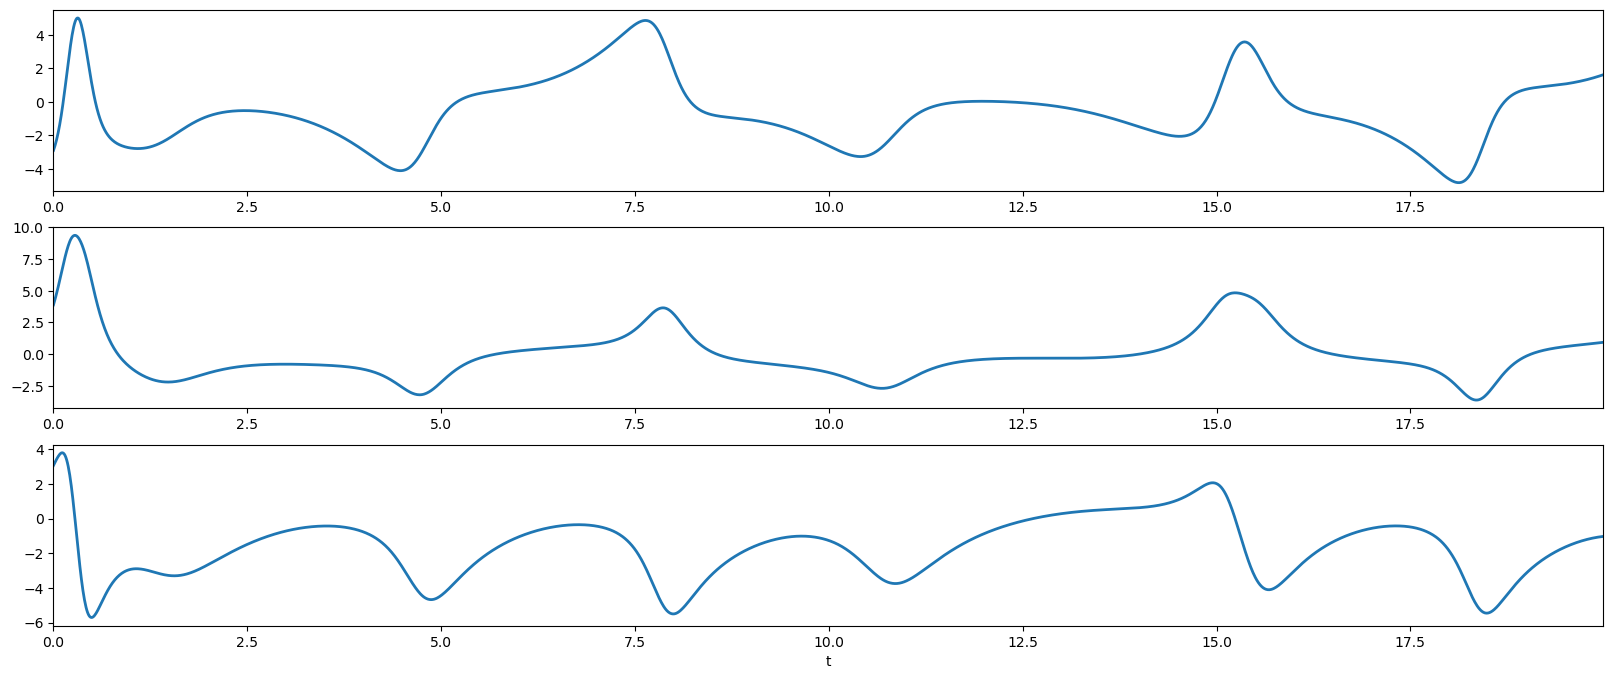

In [6]:
u,t = orc.data.sakaraya(tN = 20, dt = 0.01)
plot_time_series(u,t)

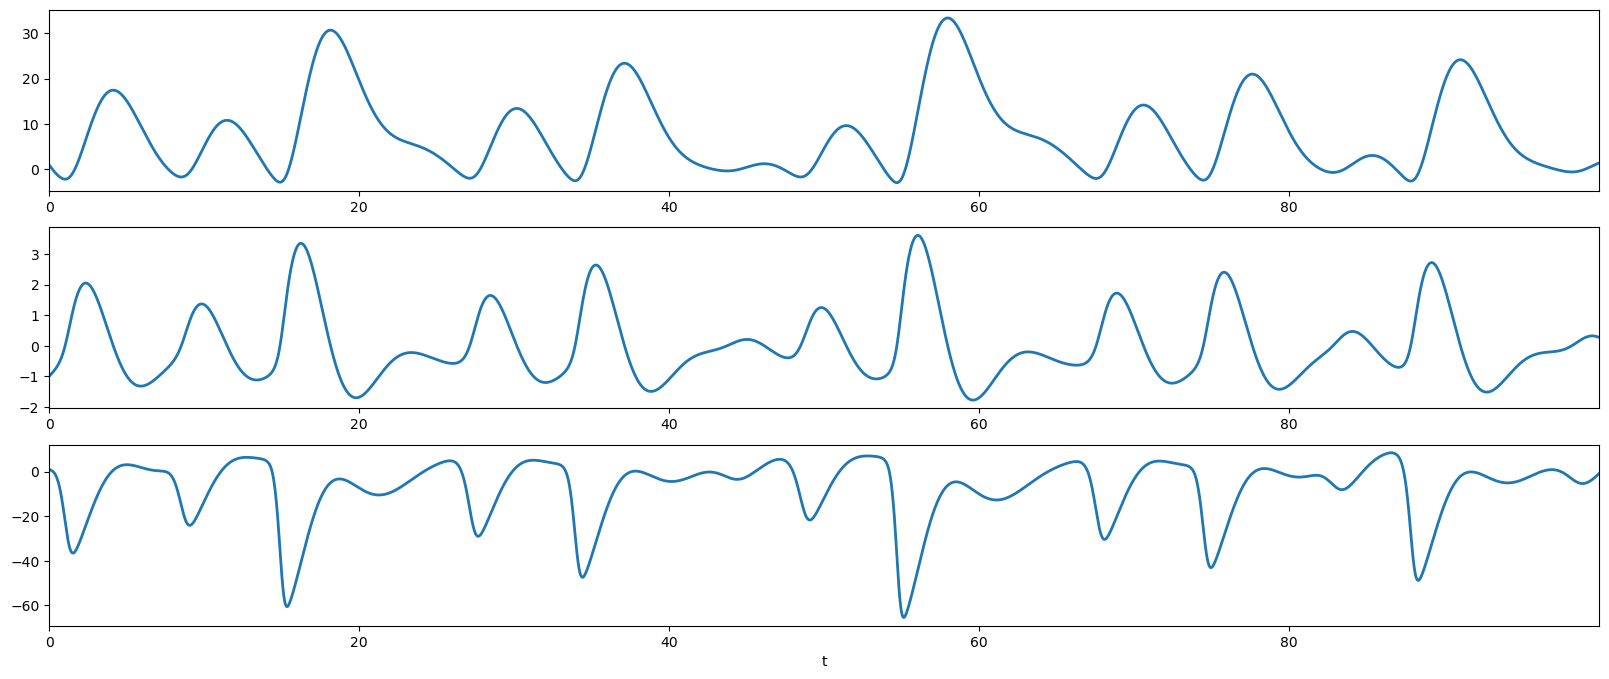

In [7]:
u,t = orc.data.colpitts(tN = 100, dt = 0.01)
plot_time_series(u,t)

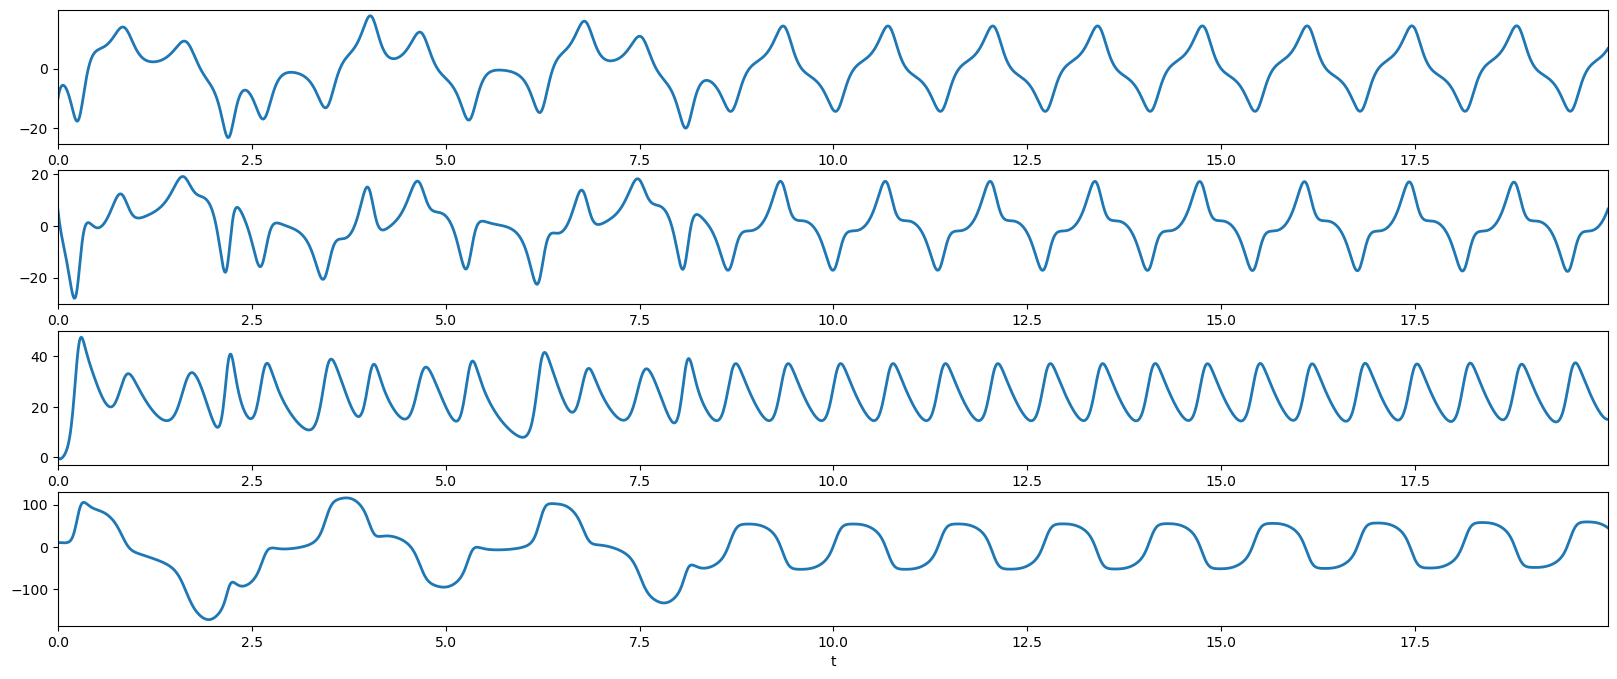

In [8]:
u,t = orc.data.hyper_lorenz63(tN = 20, dt = 0.01)
plot_time_series(u,t)

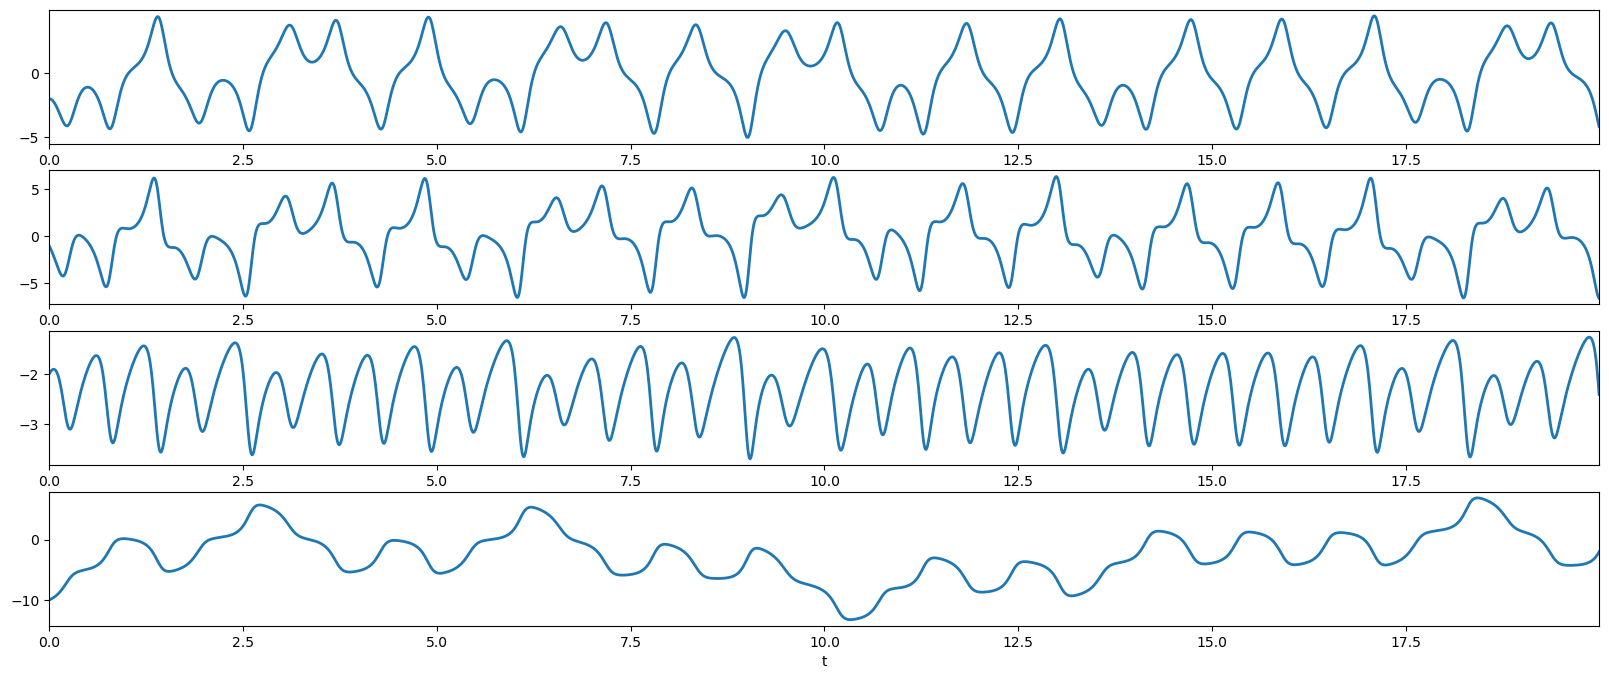

In [9]:
u,t = orc.data.hyper_xu(tN = 20, dt = 0.01)
plot_time_series(u,t)

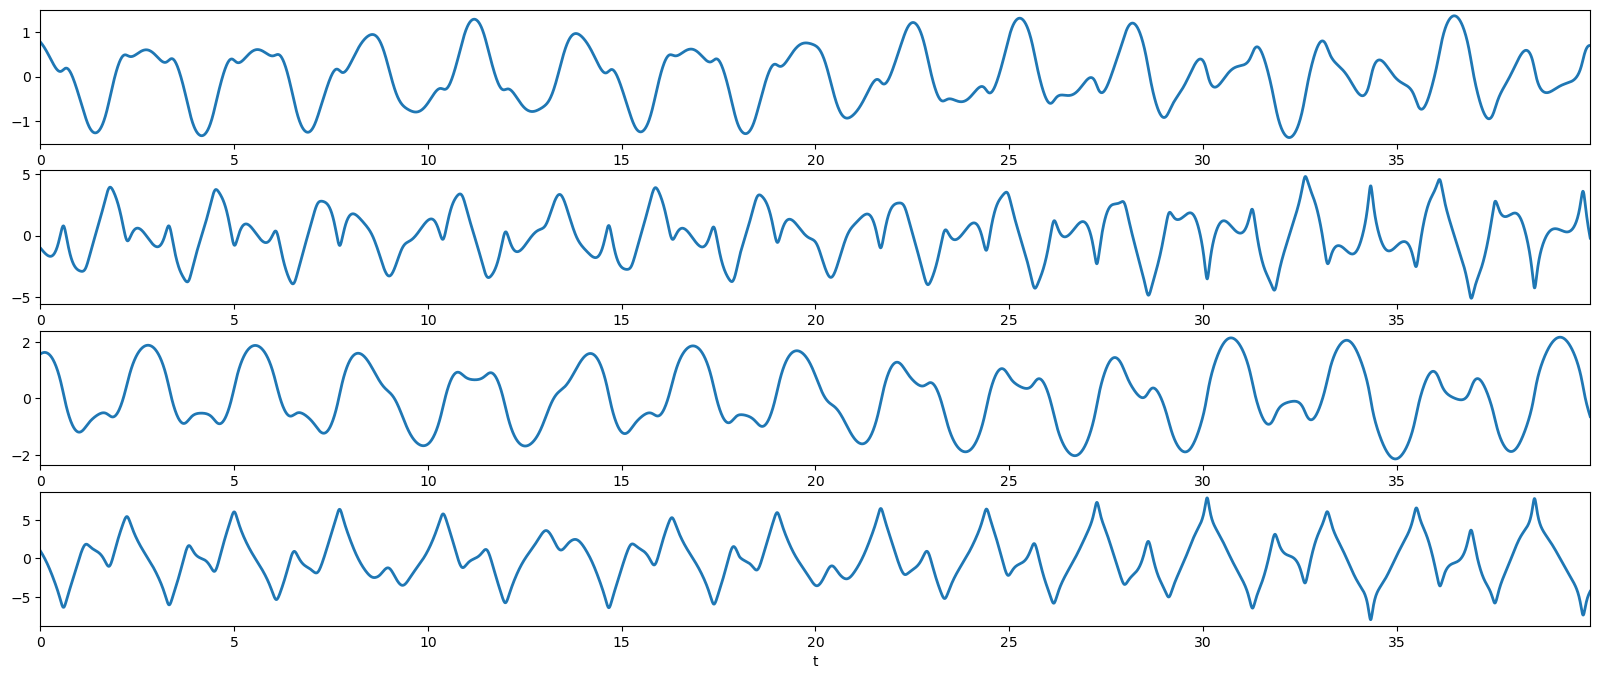

In [10]:
u,t = orc.data.double_pendulum(tN = 40, dt = 0.01, damping=0.0)
plot_time_series(u,t)

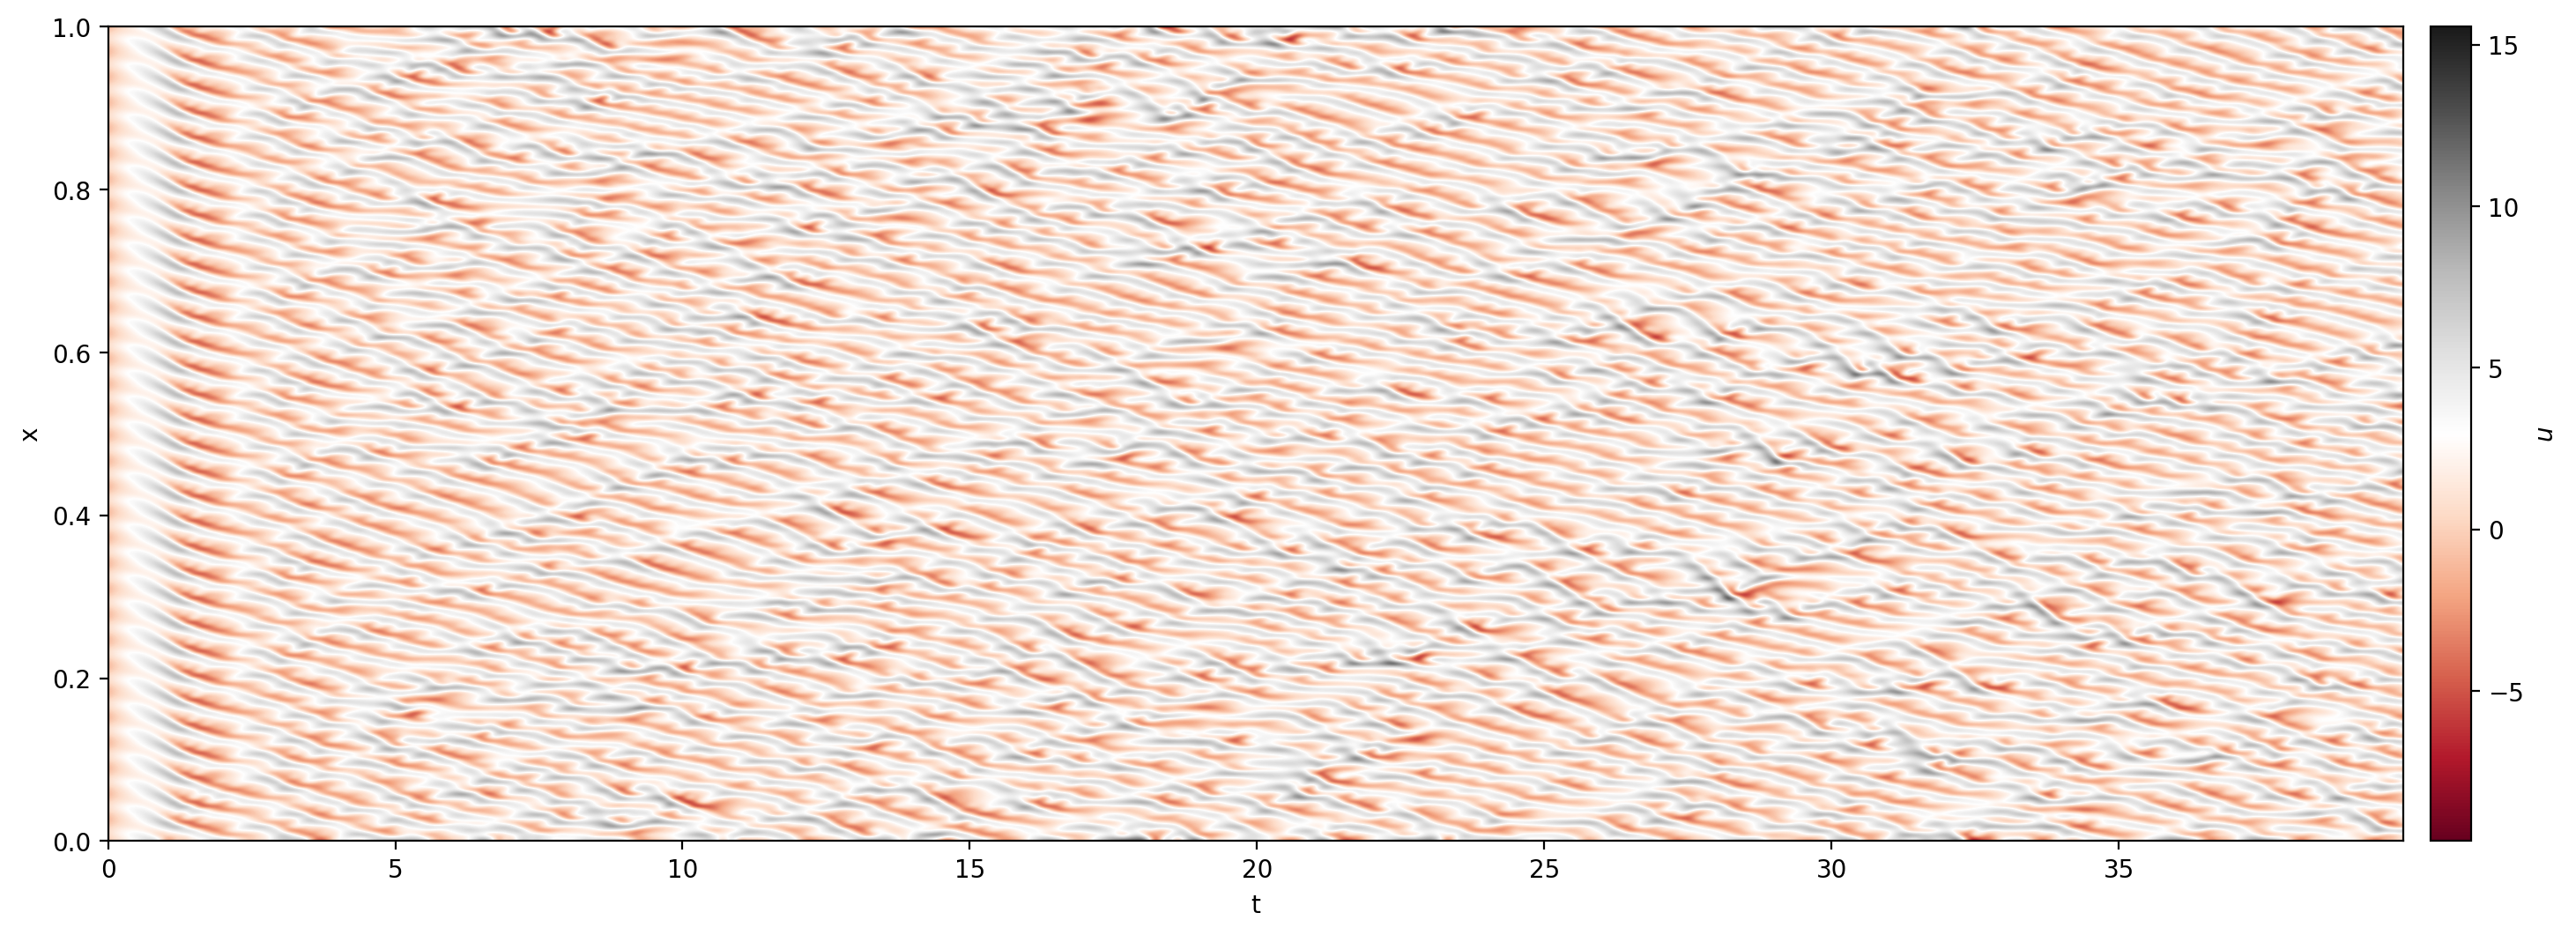

In [11]:
u,t = orc.data.lorenz96(tN = 40, dt = 0.05, N=200)
imshow_1D_spatiotemp(u, t[-1], interpolation = 'bicubic')

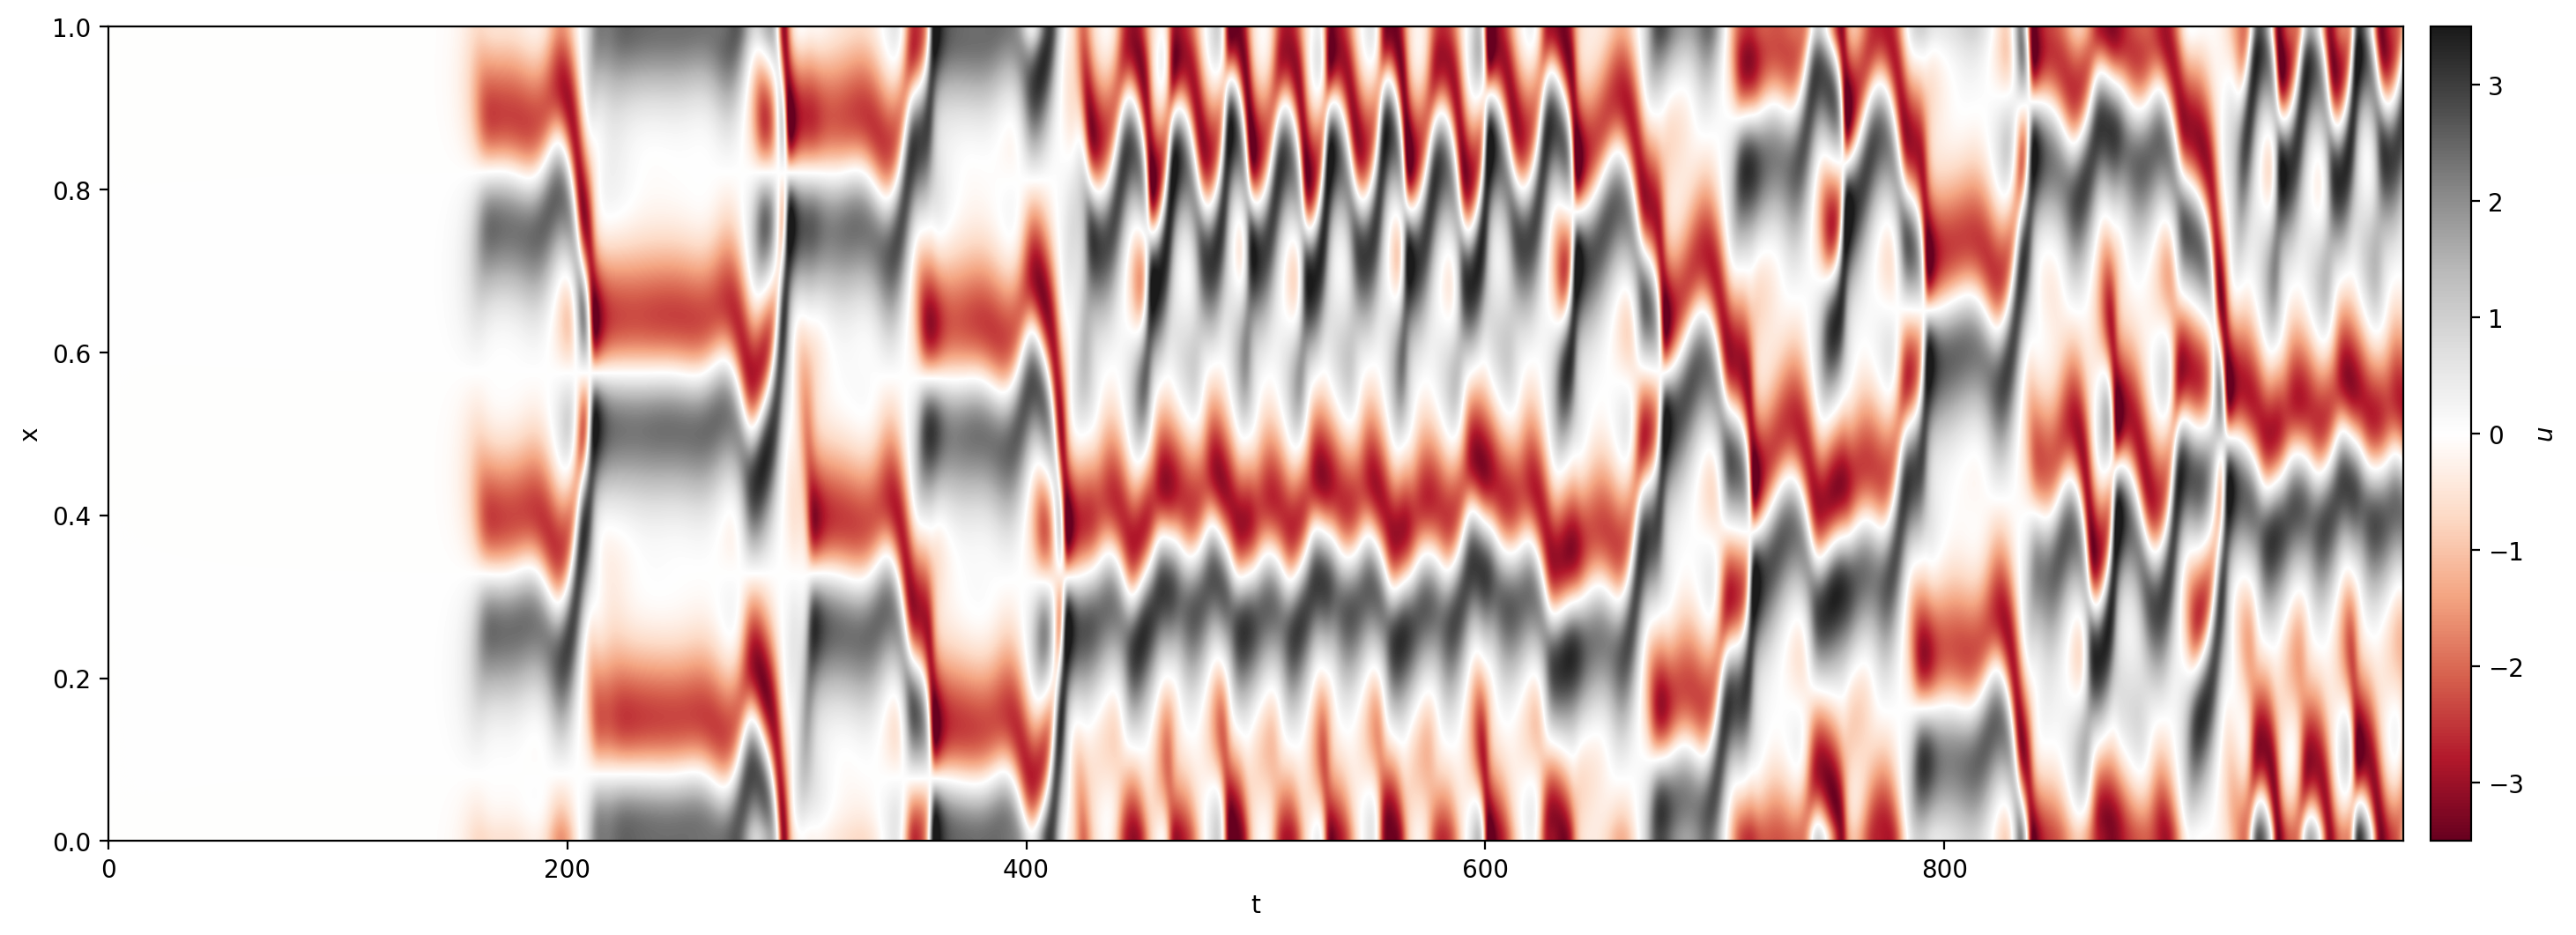

In [12]:
u,t = orc.data.KS_1D(tN=1000)
imshow_1D_spatiotemp(u, t[-1], interpolation = 'bicubic', vmax=3.5, vmin=-3.5)